In [ ]:
# https://www.youtube.com/watch?v=NUXdtN1W1FE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# need dataset
companies = pd.read_csv("1000_Companies.csv")
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


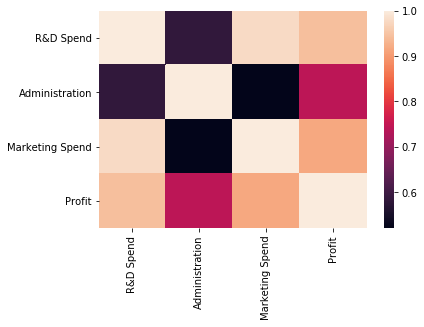

In [3]:
# build the correlation matrix
sns.heatmap(companies.corr())

In [4]:
# encode categorical data
# currently the State column has values "New York", "California", "Florida"
# need to encode the state names into numbers for linear regresion
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# encode the state names in the 3rd column
label = LabelEncoder()
X[:, 3] = label.fit_transform(X[:, 3])
ct = ColumnTransformer([('any_name', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [5]:
# avoid dummy variable trap
# remove the extra 1st column generated by OneHotEncoder
X = X[:, 1:]

In [6]:
# split data into Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# fit Multiple Linear Regression Model to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# predict the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836972, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.22936439,  91473.37719686,
       164597.05380606,  53222.82667401,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.8597105 , 177513.91053062,  75316.28143051,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396144,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669091,  56881.41475224,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649624,  63969.95996743, 108857.91214126,
       186014.72531988, 171442.64130747, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.25779409, 107724.34331255,  50194.54176913,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671743, 131137.87699644, 184880.70924516, 174609.0826688 ,
        93745.66352059,  

In [10]:
# get the coefficients and intercepts
print(regressor.coef_)
print(regressor.intercept_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.22972402591


In [12]:
# evaluate the model by calculating the R-squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268863